In [1]:
#Import the dependencies - 6.1.4 Generate Random Numbers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
#zips into tuple

In [3]:
#Add the latitdues and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
coordinates

[(78.48210997901549, -19.785577093476604),
 (-7.004900089907167, 58.50344384255928),
 (71.56578772256438, -28.353772160747837),
 (-76.14460527888369, -77.56396257152886),
 (7.391871115539942, -137.24902836153757),
 (52.612060255156706, -83.09446757533837),
 (-26.18771191547762, -83.2977175848155),
 (11.180945779886088, 19.27550713995771),
 (85.30280995157713, -100.99676607849446),
 (-71.51990355132517, -121.44190748476694),
 (26.078127868231803, 168.75616792707302),
 (8.670554924013928, 71.68888782927931),
 (69.71932238691389, 17.100032750043738),
 (-41.698563391809955, -90.03804478885179),
 (-89.16947687887209, -171.09169905067156),
 (-27.262666843486414, -158.11151391585597),
 (-81.5250311127123, -87.54427869975173),
 (-74.92064379370771, -27.022414808437418),
 (26.64621280709885, 171.6784753556641),
 (-79.63378084869659, 100.55019008532093),
 (-1.8140347870339326, 53.13669033287184),
 (42.75663836556086, -172.4565057418787),
 (-13.242805529955035, -34.9350233064649),
 (-51.059599883

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)



640

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


illoqqortoormiut gl
victoria sc
illoqqortoormiut gl
ushuaia ar
atuona pf
attawapiskat ca
coquimbo cl
am timan td
yellowknife ca
rikitea pf
butaritari ki
kavaratti in
moen no
ancud cl
vaini to
avarua ck
punta arenas cl
ushuaia ar
butaritari ki
albany au
victoria sc
bethel us
conde br
vaini to
ketchikan us
longyearbyen sj
kita ml
ayan ru
cape town za
kahului us
grand river south east mu
vaini to
mount isa au
ushuaia ar
saint-philippe re
ushuaia ar
alyangula au
askim no
lebu cl
bathsheba bb
arraial do cabo br
constitucion mx
rikitea pf
namibe ao
isangel vu
tuktoyaktuk ca
saleaula ws
tuatapere nz
petropavlovka ru
kuandian cn
kodiak us
cabedelo br
thompson ca
port blair in
bluff nz
margate za
carnarvon au
albany au
victoria sc
kabanjahe id
saint-philippe re
ostrovnoy ru
bambous virieux mu
cherskiy ru
san francisco ar
barrow us
taolanaro mg
kinanah sd
saint-philippe re
belmonte br
hobyo so
albany au
kodiak us
burns lake ca
port alfred za
dikson ru
dingle ie
skagastrond is
talnakh ru
saint-au

busselton au
busselton au
yonezawa jp
port alfred za
rikitea pf
christchurch nz
busselton au
saleaula ws
bluff nz
torbay ca
torbay ca
buariki ki
tautira pf
hithadhoo mv
albany au
punta arenas cl
sofiysk ru
port alfred za
punta arenas cl
araouane ml
victoria sc
ponta do sol cv
new norfolk au
liling cn
punta arenas cl
provideniya ru
kapaa us
cape town za
albany au
bredasdorp za
pevek ru
lolua tv
novo aripuana br
busselton au
punta arenas cl
strathmore ca
nyurba ru
simao cn
krasne ua
qaanaaq gl
saint-gaudens fr
burnie au
albany au
illoqqortoormiut gl
petnehaza hu
nemuro jp
ushuaia ar
praia da vitoria pt
porto novo cv
kapaa us
hithadhoo mv
carnarvon au
busselton au
mar del plata ar
nikolskoye ru
ribeira grande pt
qaanaaq gl
puerto ayora ec
saint-georges gf
busselton au
los llanos de aridane es
husavik is
chokurdakh ru
albany au
gawler au
guerrero negro mx
tasiilaq gl
souillac mu
georgetown sh
arraial do cabo br
port elizabeth za
vestmanna fo
jamestown sh
ushuaia ar
ushuaia ar
mataura pf
tu

jiddah sa
kopyevo ru
inca es
saint-philippe re
palabuhanratu id
taolanaro mg
hilo us
aklavik ca


In [9]:
#6.2.6 Get the City Weather Data

import requests
from config import weather_api_key

In [10]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9c6a9780b91951d793a52dea54d68ef


In [11]:
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [15]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9c6a9780b91951d793a52dea54d68ef&q=inca


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

    
    

Processing Record 1 of Set 13 | illoqqortoormiut
Processing Record 2 of Set 13 | victoria
Processing Record 3 of Set 13 | ushuaia
Processing Record 4 of Set 13 | atuona
Processing Record 5 of Set 13 | attawapiskat
Processing Record 6 of Set 13 | coquimbo
Processing Record 7 of Set 13 | am timan
Processing Record 8 of Set 13 | yellowknife
Processing Record 9 of Set 13 | rikitea
Processing Record 10 of Set 13 | butaritari
Processing Record 11 of Set 13 | kavaratti
Processing Record 12 of Set 13 | moen
Processing Record 13 of Set 13 | ancud
Processing Record 14 of Set 13 | vaini
Processing Record 15 of Set 13 | avarua
Processing Record 16 of Set 13 | punta arenas
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | bethel
Processing Record 19 of Set 13 | conde
Processing Record 20 of Set 13 | ketchikan
Processing Record 21 of Set 13 | longyearbyen
Processing Record 22 of Set 13 | kita
Processing Record 23 of Set 13 | ayan
Processing Record 24 of Set 13 | cape town
Proc

Processing Record 1 of Set 17 | almaznyy
Processing Record 2 of Set 17 | rosarito
Processing Record 3 of Set 17 | asau
Processing Record 4 of Set 17 | cherdyn
Processing Record 5 of Set 17 | iseyin
Processing Record 6 of Set 17 | yerbogachen
Processing Record 7 of Set 17 | malakal
Processing Record 8 of Set 17 | ilulissat
Processing Record 9 of Set 17 | bairiki
Processing Record 10 of Set 17 | manakara
Processing Record 11 of Set 17 | camacha
Processing Record 12 of Set 17 | miguel auza
Processing Record 13 of Set 17 | cidreira
Processing Record 14 of Set 17 | vila velha
Processing Record 15 of Set 17 | kodinsk
Processing Record 16 of Set 17 | sur
Processing Record 17 of Set 17 | pansemal
Processing Record 18 of Set 17 | stendal
Processing Record 19 of Set 17 | stromness
Processing Record 20 of Set 17 | nuevo progreso
Processing Record 21 of Set 17 | reconquista
Processing Record 22 of Set 17 | saint george
Processing Record 23 of Set 17 | coihaique
Processing Record 24 of Set 17 | por

Processing Record 1 of Set 21 | novo aripuana
Processing Record 2 of Set 21 | strathmore
Processing Record 3 of Set 21 | nyurba
Processing Record 4 of Set 21 | simao
Processing Record 5 of Set 21 | krasne
Processing Record 6 of Set 21 | saint-gaudens
Processing Record 7 of Set 21 | petnehaza
Processing Record 8 of Set 21 | nemuro
Processing Record 9 of Set 21 | porto novo
Processing Record 10 of Set 21 | saint-georges
Processing Record 11 of Set 21 | los llanos de aridane
Processing Record 12 of Set 21 | gawler
Processing Record 13 of Set 21 | souillac
Processing Record 14 of Set 21 | tual
Processing Record 15 of Set 21 | andenes
Processing Record 16 of Set 21 | bilibino
Processing Record 17 of Set 21 | hvammstangi
Processing Record 18 of Set 21 | hofn
Processing Record 19 of Set 21 | mehamn
Processing Record 20 of Set 21 | mugur-aksy
Processing Record 21 of Set 21 | gamba
Processing Record 22 of Set 21 | hervey bay
Processing Record 23 of Set 21 | marion
Processing Record 24 of Set 21

Processing Record 1 of Set 25 | las palmas
Processing Record 2 of Set 25 | leh
Processing Record 3 of Set 25 | zverinogolovskoye
Processing Record 4 of Set 25 | bakchar
Processing Record 5 of Set 25 | karakose
Processing Record 6 of Set 25 | tunduru
Processing Record 7 of Set 25 | lyubeshiv
Processing Record 8 of Set 25 | angola
Processing Record 9 of Set 25 | vilyuysk
Processing Record 10 of Set 25 | george town
Processing Record 11 of Set 25 | zhigansk
Processing Record 12 of Set 25 | makat
Processing Record 13 of Set 25 | jaroslaw
Processing Record 14 of Set 25 | sitka
Processing Record 15 of Set 25 | dwarka
Processing Record 16 of Set 25 | port-cartier
Processing Record 17 of Set 25 | fortuna
Processing Record 18 of Set 25 | ossora
Processing Record 19 of Set 25 | tukrah
Processing Record 20 of Set 25 | bocaranga
Processing Record 21 of Set 25 | quballat
Processing Record 22 of Set 25 | santa maria
Processing Record 23 of Set 25 | hualmay
Processing Record 24 of Set 25 | atherton
P

In [17]:
#6.2.6 TRY-Except and 1. PARSING THE JSON FILE 2. ASSIGNING VARIABLES for each piece of information we need
##3 ADDING the data to the cities list in a dictionary format.. 

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | am timan
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | kavaratti
Processing Record 12 of Set 1 | moen
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | conde
Processing Record 20 of Set 1 | ketchikan
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 

City not found. Skipping...
Processing Record 36 of Set 4 | andapa
Processing Record 37 of Set 4 | pisco
Processing Record 38 of Set 4 | uige
Processing Record 39 of Set 4 | sedelnikovo
City not found. Skipping...
Processing Record 40 of Set 4 | teberda
Processing Record 41 of Set 4 | provideniya
Processing Record 42 of Set 4 | inuvik
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | solnechnyy
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | waw
Processing Record 47 of Set 4 | najran
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | turukhansk
Processing Record 50 of Set 4 | takaka
Processing Record 1 of Set 5 | almaznyy
Processing Record 2 of Set 5 | rosarito
Processing Record 3 of Set 5 | asau
Processing Record 4 of Set 5 | cherdyn
Processing Record 5 of Set 5 | iseyin
Processing Record 6 of Set 5 | yerbogachen
Processing Record 7 of Set 5 | malakal
Processing Record 8 of Set 5 | ilulissat
Processing Record 9 of 

Processing Record 22 of Set 8 | temixco
Processing Record 23 of Set 8 | natchitoches
Processing Record 24 of Set 8 | mendahara
City not found. Skipping...
Processing Record 25 of Set 8 | northam
Processing Record 26 of Set 8 | leningradskiy
Processing Record 27 of Set 8 | karamay
City not found. Skipping...
Processing Record 28 of Set 8 | komsomolskiy
Processing Record 29 of Set 8 | pedasi
Processing Record 30 of Set 8 | kaitangata
Processing Record 31 of Set 8 | fort nelson
Processing Record 32 of Set 8 | lata
Processing Record 33 of Set 8 | biabou
Processing Record 34 of Set 8 | san cristobal
Processing Record 35 of Set 8 | tupaciguara
Processing Record 36 of Set 8 | asyut
Processing Record 37 of Set 8 | la ronge
Processing Record 38 of Set 8 | zemaiciu naumiestis
Processing Record 39 of Set 8 | wajima
Processing Record 40 of Set 8 | sumbawanga
Processing Record 41 of Set 8 | llata
Processing Record 42 of Set 8 | yonezawa
Processing Record 43 of Set 8 | christchurch
Processing Record

Processing Record 11 of Set 12 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 12 of Set 12 | hof
Processing Record 13 of Set 12 | ugra
Processing Record 14 of Set 12 | mareeba
Processing Record 15 of Set 12 | mango
Processing Record 16 of Set 12 | nador
Processing Record 17 of Set 12 | karaul
City not found. Skipping...
Processing Record 18 of Set 12 | faya
Processing Record 19 of Set 12 | ko samui
Processing Record 20 of Set 12 | raga
Processing Record 21 of Set 12 | cadillac
Processing Record 22 of Set 12 | denpasar
Processing Record 23 of Set 12 | chicaman
Processing Record 24 of Set 12 | abalak
Processing Record 25 of Set 12 | poum
Processing Record 26 of Set 12 | butterworth
Processing Record 27 of Set 12 | san pedro
Processing Record 28 of Set 12 | acarau
Processing Record 29 of Set 12 | barabinsk
Processing Record 30 of Set 12 | mehran
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | sorland
Processing Record 33 of Set 12 | yar-sale
P

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.2855,114.1577,61.25,86,100,8.99,HK,2022-02-06 22:51:55
1,Ushuaia,-54.8000,-68.3000,62.22,63,75,10.36,AR,2022-02-06 22:47:41
2,Atuona,-9.8000,-139.0333,77.74,79,11,16.93,PF,2022-02-06 22:51:55
3,Coquimbo,-29.9533,-71.3436,65.93,77,40,12.66,CL,2022-02-06 22:51:56
4,Am Timan,11.0297,20.2827,72.09,20,2,6.33,TD,2022-02-06 22:51:56
5,Yellowknife,62.4560,-114.3525,0.41,97,100,10.36,CA,2022-02-06 22:51:20
6,Rikitea,-23.1203,-134.9692,79.30,70,3,17.92,PF,2022-02-06 22:51:57
7,Butaritari,3.0707,172.7902,82.09,76,42,15.82,KI,2022-02-06 22:51:57
8,Kavaratti,10.5669,72.6420,77.74,69,18,10.76,IN,2022-02-06 22:51:58
9,Moen,69.1304,18.6123,28.47,68,40,8.05,NO,2022-02-06 22:51:58


In [21]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)
                   
                   

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-02-06 22:51:55,22.2855,114.1577,61.25,86,100,8.99
1,Ushuaia,AR,2022-02-06 22:47:41,-54.8000,-68.3000,62.22,63,75,10.36
2,Atuona,PF,2022-02-06 22:51:55,-9.8000,-139.0333,77.74,79,11,16.93
3,Coquimbo,CL,2022-02-06 22:51:56,-29.9533,-71.3436,65.93,77,40,12.66
4,Am Timan,TD,2022-02-06 22:51:56,11.0297,20.2827,72.09,20,2,6.33
5,Yellowknife,CA,2022-02-06 22:51:20,62.4560,-114.3525,0.41,97,100,10.36
6,Rikitea,PF,2022-02-06 22:51:57,-23.1203,-134.9692,79.30,70,3,17.92
7,Butaritari,KI,2022-02-06 22:51:57,3.0707,172.7902,82.09,76,42,15.82
8,Kavaratti,IN,2022-02-06 22:51:58,10.5669,72.6420,77.74,69,18,10.76
9,Moen,NO,2022-02-06 22:51:58,69.1304,18.6123,28.47,68,40,8.05


In [22]:
# Create the output file (CSV).

output_data_file = "/Users/lisahanson/desktop/class/API/world_weather_analysis/weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today


'02/06/22'

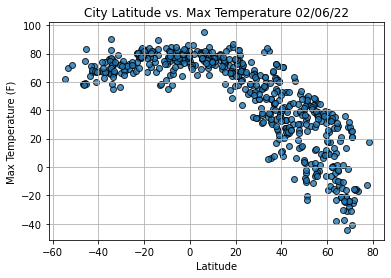

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

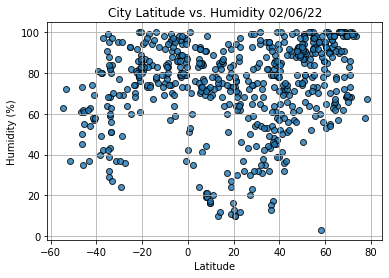

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

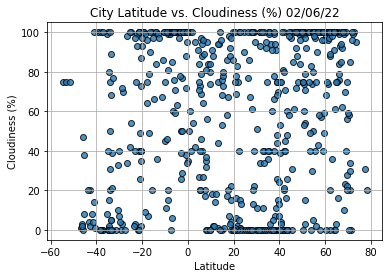

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

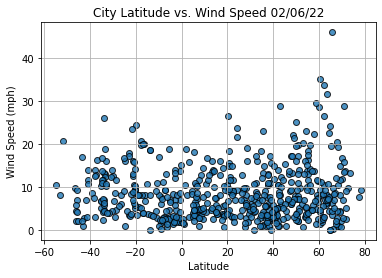

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()